<a href="https://colab.research.google.com/github/dushyantsinghraghav/Advanced-ML/blob/main/Neural_Network_for_cancer_Datatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install mglearn
import mglearn
display(mglearn.plots.plot_logistic_regression_graph)

<function mglearn.plot_nn_graphs.plot_logistic_regression_graph()>

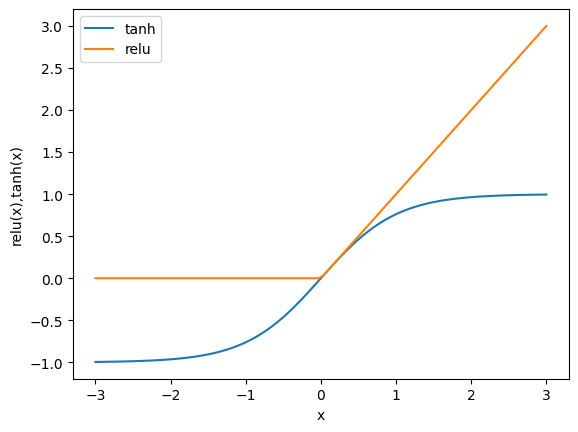

In [5]:
#lets write some small code for neural network understanding which can be used for plotting the neural network curve
import numpy as np
line = np.linspace(-3,3,100)
import matplotlib.pyplot as plt
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend()
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")
plt.show()

Text(0, 0.5, 'feature 1')

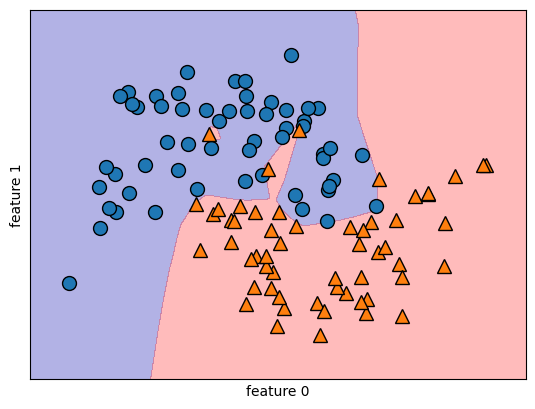

In [14]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=150,noise=0.26,random_state=3)
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [10]:
print(X.shape)

(100, 2)


Text(0, 0.5, 'feature 1')

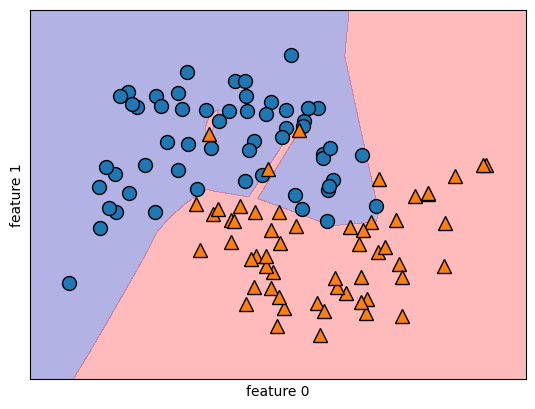

In [16]:
##The above figure shows the decision boundary for the Neural network moon dataset
## in this the default non linearity being used is relu and with 10 hidden layers
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[20]).fit(X_train,y_train)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

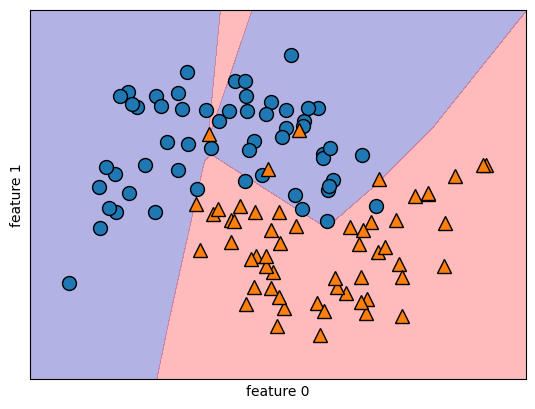

In [18]:
##now using two hidden layers with 10 units each and see the plot and compare it with the above
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'feature 1')

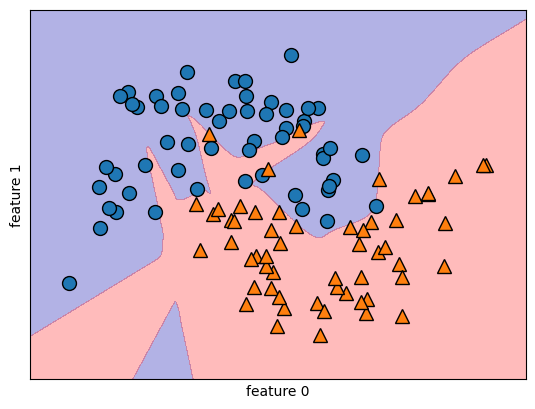

In [19]:
## Now two hidden layers with 10 units each but with tanh non linearity
mlp = MLPClassifier(solver='lbfgs',activation = "tanh",random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

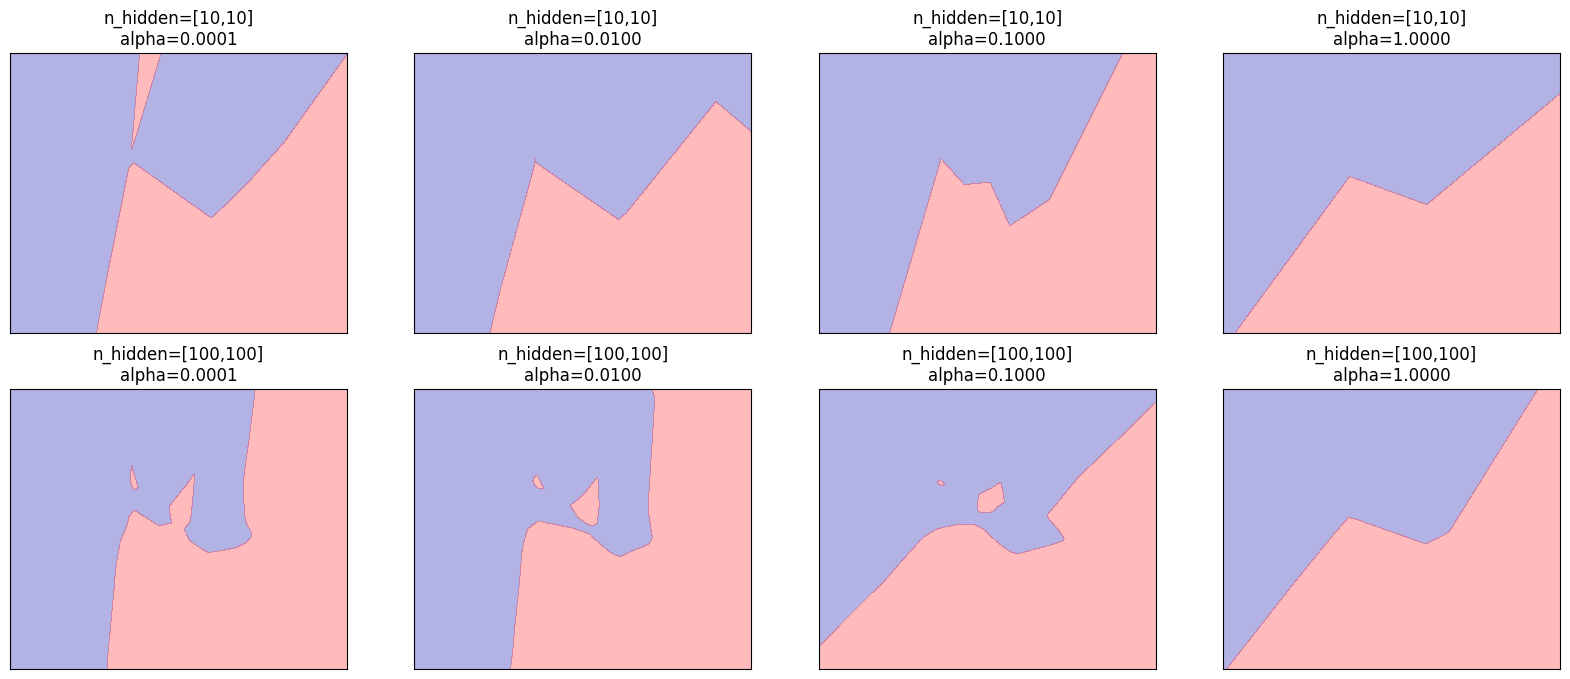

In [20]:
#lets control the complexity of neural network using the regularization techniques basically using the l2 techniques and passing the hidden layers through a variable
# to understand the optimal parameters for the neural network
fig , axes = plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
      mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
      mlp.fit(X_train,y_train)
      mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
      ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))
plt.show()


In [22]:
##lets apply the neural network to the breast cancer dataset which is a real world daataset
#MLP is the above neural network model
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load the breast cancer dataset
cancer = load_breast_cancer()
print("Cancer data per_feature maxima :\n{}".format(cancer.data.max(axis=0)))

Cancer data per_feature maxima :
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [23]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [24]:
##lets apply some preprocessing steps such as scaling to improve the accuracy of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#compute the mean value per feature on  the training set
mean_on_train = X_train.mean(axis=0)
#compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
#subtract the mean and scale to unit variance
X_train_scaled = (X_train - mean_on_train) / std_on_train
#use the computed mean and std to transform the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
#Lets make use of the adam optimizer and make the number of iterations as 1000
mlp = MLPClassifier(max_iter=1000,random_state=0,solver="adam",alpha =1)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


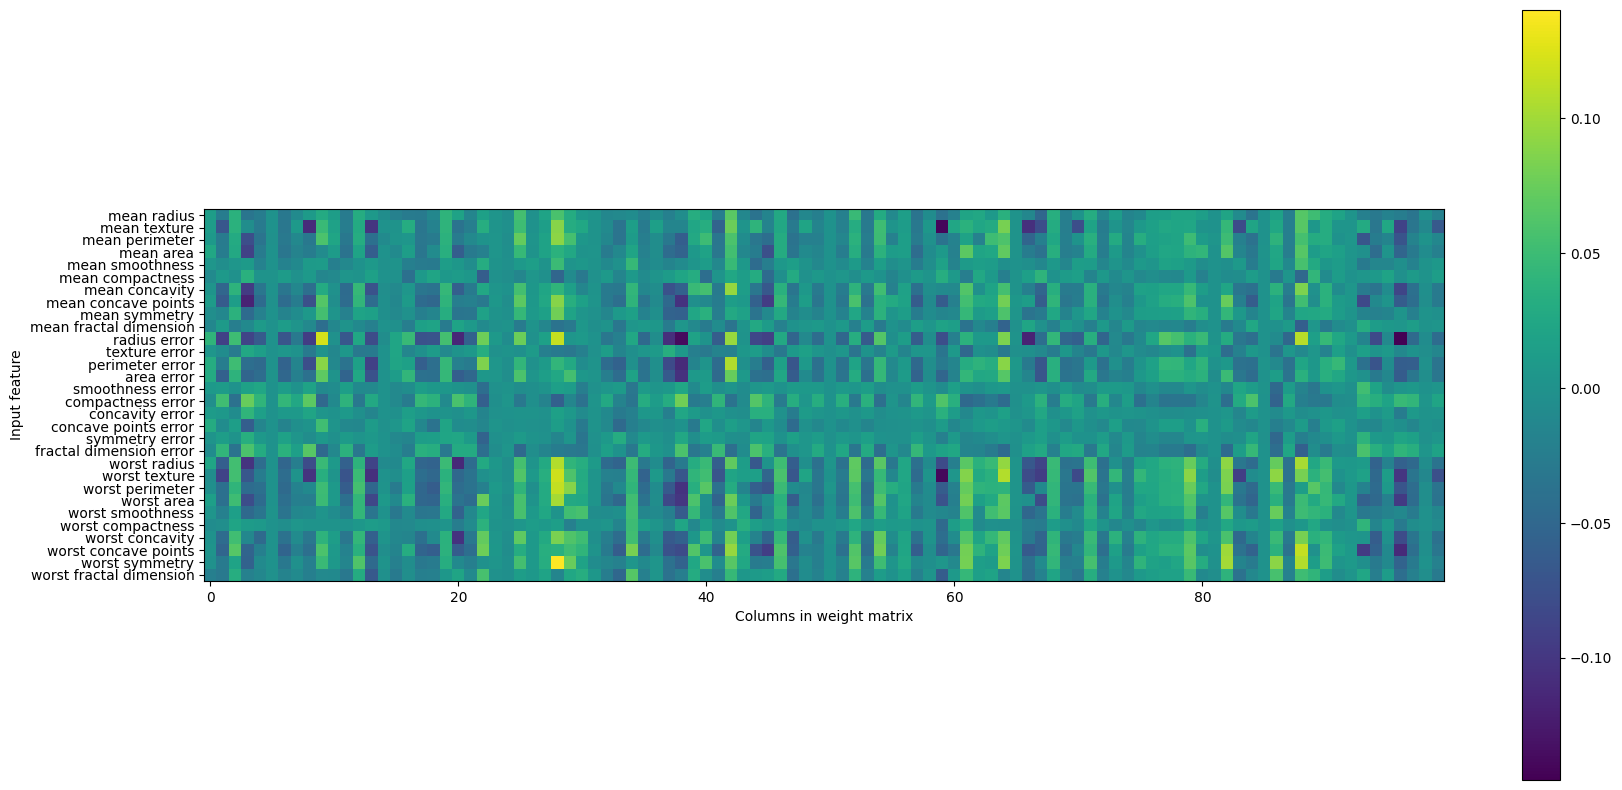

In [30]:
##plot to show the weights generalized by model for all the features
plt.figure(figsize=(20, 10))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()